In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Daily+temperature+data.csv')
data.columns=['Date', 'Temp']
# data['Date'] = pd.to_datetime(data['Date'], format="%m-%d-%Y")
data = data.set_index('Date')
data.head(12)

,Temp
Date,
01-01-2017,14.3
01-02-2017,17.4
01-03-2017,18.5
01-04-2017,16.8
01-05-2017,11.5
01-06-2017,9.5
01-07-2017,12.2
01-08-2017,15.7
01-09-2017,16.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 01-01-2017 to 12/31/2018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    730 non-null    float64
dtypes: float64(1)
memory usage: 11.4+ KB


In [4]:
train_len = 511
# cannot use random methods like train_test split since order is important. 
train = data[:train_len] # before 1959
test = data[train_len:] # this is 1959- onwards

In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Temp'])
model_fit =  model.fit(smoothing_level= 0.2, optimized = False) # smoothing level is the alpha
print(model_fit.params)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] =  model_fit.forecast(219)

{'smoothing_level': 0.2, 'smoothing_slope': None, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 14.3, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


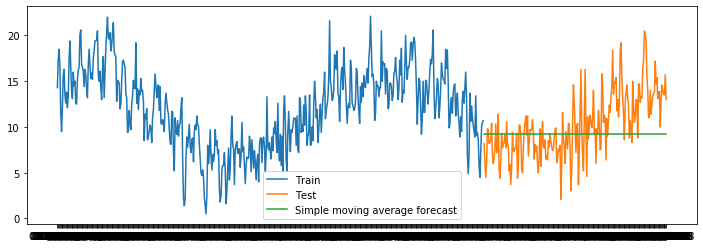

In [6]:
### plot train test and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label = 'Simple moving average forecast')
plt.legend(loc='best')

In [7]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp'] - y_hat_ses['ses_forecast'])/test['Temp'])*100, 2)
rmse, mape

(3.56, 30.24)

## Holt's method with trend

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.array(train['Temp']), seasonal_periods = 12, trend = 'additive', seasonal=None)
model_fit = model.fit(smoothing_level = 0.5, smoothing_slope = 0.01 ,optimized = False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(219)

{'smoothing_level': 0.5, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 14.3, 'initial_slope': 3.099999999999998, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


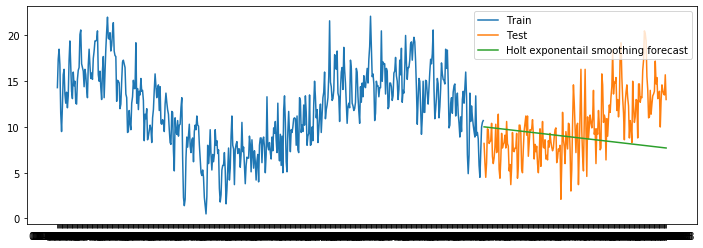

In [10]:
### plot train test and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label = 'Holt exponentail smoothing forecast')
plt.legend(loc='best')

In [11]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp'] - y_hat_holt['holt_forecast'])/test['Temp'])*100, 2)
rmse, mape

(4.11, 34.17)

## Holt's method with trend and seasonality

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.array(train['Temp']), seasonal_periods = 30, trend = 'additive', seasonal='add')
model_fit = model.fit(optimized = True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(219)

{'smoothing_level': 0.6746181790382475, 'smoothing_slope': 2.9104944726839204e-25, 'smoothing_seasonal': 1.3135682334928428e-24, 'damping_slope': nan, 'initial_level': 12.385428247523706, 'initial_slope': 5.472519563107773e-23, 'initial_seasons': array([3.06576585, 2.57167561, 2.59347279, 3.1032156 , 2.57753832,
       2.39890865, 2.50841099, 3.15923703, 3.31009357, 2.99042322,
       3.07098738, 2.81638854, 1.82038689, 2.77133564, 2.96935768,
       2.99683318, 1.94766889, 2.75726549, 2.45511863, 1.77655286,
       1.9980976 , 2.83114692, 1.658501  , 0.96252584, 1.82557137,
       1.82975108, 2.09879099, 2.71482524, 3.23098637, 3.24699864]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


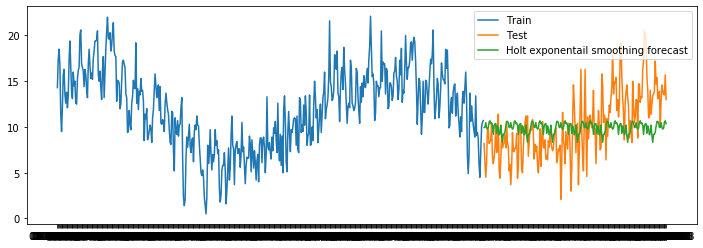

In [16]:
### plot train test and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label = 'Holt exponentail smoothing forecast')
plt.legend(loc='best')

In [17]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp'] - y_hat_holt['holt_forecast'])/test['Temp'])*100, 2)
rmse, mape

(3.5, 32.83)